# Training and test set alternative split
- Ano com mais permanência de usuário
- season recommendation
- bipartite block with most permanence

Alto nível de persistência:

$[2005,2013]$ training

$[2014,2018]$ test


Baixo nível de persistência porém mais dados:

$[2005,2017]$ training

$2018$ test

ou

$[2005,2016]$ training

$[2017,2018]$ test

In [46]:
import pandas as pd
import numpy as np

## read phoenix.csv check-in file

In [2]:
def string_to_array(string):
    if string == '':
        return list()
    return eval(string)
def string_to_date(string):
    return pd.to_datetime(string)

df_checkin_phoenix=pd.read_csv("../data/checkin/phoenix.csv",converters={'categories':string_to_array})
df_checkin_phoenix['date']=pd.to_datetime(df_checkin_phoenix['date'])
df_checkin_phoenix.head()

,user_id,business_id,date,latitude,longitude,categories,subarea_id
0,dUVOC_2EDF0sbA392RhfoQ,WTqjgwHlXbSFevF32_DJVw,2015-01-20 20:16:11,33.259702,-111.790203,"[Cosmetic Dentists, Orthodontists, General Den...",12843.0
1,8Y_irXocZdZxLs_qgzpjBw,WTqjgwHlXbSFevF32_DJVw,2017-03-17 06:36:38,33.259702,-111.790203,"[Cosmetic Dentists, Orthodontists, General Den...",12843.0
2,wM4yVwPDeMMUxwFvGLiREg,WTqjgwHlXbSFevF32_DJVw,2017-12-19 05:33:02,33.259702,-111.790203,"[Cosmetic Dentists, Orthodontists, General Den...",12843.0
3,8-tL6MQbXPawMlaf8kbqHg,WTqjgwHlXbSFevF32_DJVw,2014-02-04 01:20:04,33.259702,-111.790203,"[Cosmetic Dentists, Orthodontists, General Den...",12843.0
4,L8d61tDHFB5CemHBUvxn-g,WTqjgwHlXbSFevF32_DJVw,2016-07-12 20:49:43,33.259702,-111.790203,"[Cosmetic Dentists, Orthodontists, General Den...",12843.0


## create columns for year and month

In [3]:
df_checkin_phoenix['year']=df_checkin_phoenix['date'].apply(lambda checkin: checkin.year)

In [4]:
df_checkin_phoenix['month']=df_checkin_phoenix['date'].apply(lambda checkin: checkin.month)

In [5]:
df_checkin_phoenix.head()

,user_id,business_id,date,latitude,longitude,categories,subarea_id,year,month
0,dUVOC_2EDF0sbA392RhfoQ,WTqjgwHlXbSFevF32_DJVw,2015-01-20 20:16:11,33.259702,-111.790203,"[Cosmetic Dentists, Orthodontists, General Den...",12843.0,2015,1
1,8Y_irXocZdZxLs_qgzpjBw,WTqjgwHlXbSFevF32_DJVw,2017-03-17 06:36:38,33.259702,-111.790203,"[Cosmetic Dentists, Orthodontists, General Den...",12843.0,2017,3
2,wM4yVwPDeMMUxwFvGLiREg,WTqjgwHlXbSFevF32_DJVw,2017-12-19 05:33:02,33.259702,-111.790203,"[Cosmetic Dentists, Orthodontists, General Den...",12843.0,2017,12
3,8-tL6MQbXPawMlaf8kbqHg,WTqjgwHlXbSFevF32_DJVw,2014-02-04 01:20:04,33.259702,-111.790203,"[Cosmetic Dentists, Orthodontists, General Den...",12843.0,2014,2
4,L8d61tDHFB5CemHBUvxn-g,WTqjgwHlXbSFevF32_DJVw,2016-07-12 20:49:43,33.259702,-111.790203,"[Cosmetic Dentists, Orthodontists, General Den...",12843.0,2016,7


## group by year and count check-ins in each year 2005-2018

In [7]:
df_checkin_phoenix[['user_id','year']].groupby('year').count().rename(columns={'user_id':'Check-ins'}).rename_axis('Ano')

,Check-ins
Ano,
2005,32
2006,945
2007,5524
2008,14407
2009,23199
2010,45568
2011,91418
2012,101620
2013,104009


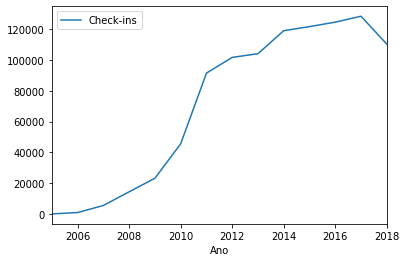

In [9]:
df_checkin_phoenix[['user_id','year']].groupby('year').count().rename(columns={'user_id':'Check-ins'}).rename_axis('Ano').plot()

## plot graph of check-ins count of all months of all years except 2005 and 2018

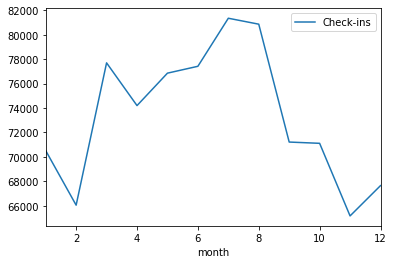

In [26]:
df_checkin_phoenix[~df_checkin_phoenix['year'].isin([2005,2018])][['user_id','month']].groupby('month').count().rename(columns={'user_id':'Check-ins'}).plot()

## plot graph of check-ins grouping by year and month

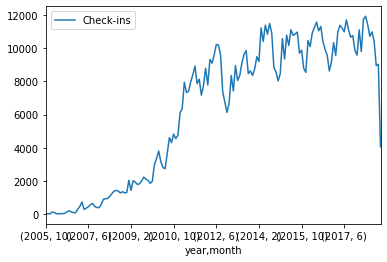

In [29]:
df_checkin_phoenix[['user_id','year','month']].groupby(['year','month']).count().rename(columns={'user_id':'Check-ins'}).plot()

In [33]:
df_checkin_phoenix[['user_id','year','month']].groupby(['year','month']).count().describe()

,user_id
count,158.000000
mean,6267.810127
std,4224.615146
min,6.000000
25%,1516.500000
50%,8007.000000
75%,9923.250000
max,11938.000000


In [ ]:
for year in df_checkin_phoenix[['year']].nunique()

In [143]:
df_persistence=pd.DataFrame(columns=['rate_of_persistence','persistence_rate_change'])
df_persistence.index.name="year"

years=df_checkin_phoenix['year'].unique()
years.sort()
years=years.tolist()
# never include last item
number_of_years=len(years)
years_list=list()
old_user_persistence_rate=0
while len(years_list)<number_of_years-1:
    years_list.append(years.pop(0))
    df_checkin_training=df_checkin_phoenix[df_checkin_phoenix['year'].isin(years_list)]['user_id'].drop_duplicates()
    df_checkin_test=df_checkin_phoenix[df_checkin_phoenix['year'].isin(years)][['user_id']].drop_duplicates()
    
    users_training=len(df_checkin_training)
    users_training_persist_on_test=len(pd.merge(df_checkin_training,df_checkin_test,how='inner'))
    rate_of_persistence=users_training_persist_on_test/users_training
    persistence_rate_change=rate_of_persistence-old_user_persistence_rate
    
    df_persistence.loc[years_list[-1]]=[rate_of_persistence,persistence_rate_change]
#     df_persistence=df_persistence.append({'rate_of_persistence':rate_of_persistence,
#                            'persistence_rate_change':persistence_rate_change},ignore_index=True)
    
    print("Block border:",years_list[-1],"-",years_list[-1]+1)
    print(years_list,"|",years)
    print("Users on training = %d; Users on test = %d; Rate of persistence: %.4f; Persistence rate change: %.4f."
          % (users_training,users_training_persist_on_test,rate_of_persistence,persistence_rate_change))
    print()
    old_user_persistence_rate=rate_of_persistence

Block border: 2005 - 2006
[2005] | [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Users on training = 6; Users on test = 6; Rate of persistence: 1.0000; Persistence rate change: 1.0000.

Block border: 2006 - 2007
[2005, 2006] | [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Users on training = 50; Users on test = 49; Rate of persistence: 0.9800; Persistence rate change: -0.0200.

Block border: 2007 - 2008
[2005, 2006, 2007] | [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Users on training = 261; Users on test = 250; Rate of persistence: 0.9579; Persistence rate change: -0.0221.

Block border: 2008 - 2009
[2005, 2006, 2007, 2008] | [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Users on training = 851; Users on test = 822; Rate of persistence: 0.9659; Persistence rate change: 0.0081.

Block border: 2009 - 2010
[2005, 2006, 2007, 2008, 2009] | [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018

In [144]:
df_persistence

,rate_of_persistence,persistence_rate_change
year,,
2005,1.000000,1.000000
2006,0.980000,-0.020000
2007,0.957854,-0.022146
2008,0.965922,0.008068
2009,0.959794,-0.006129
2010,0.953899,-0.005895
2011,0.940587,-0.013312
2012,0.922815,-0.017771
2013,0.905865,-0.016950


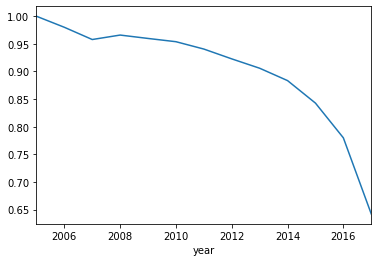

In [145]:
df_persistence.rate_of_persistence.plot()

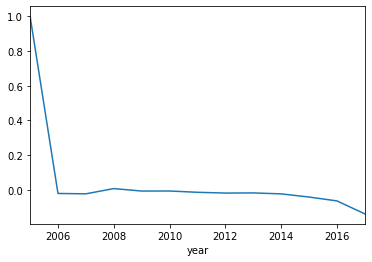

In [146]:
df_persistence.persistence_rate_change.plot()

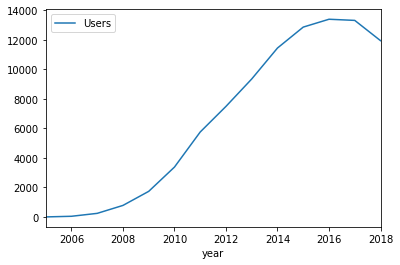

In [103]:
df_checkin_phoenix[['user_id','year']].drop_duplicates(['user_id','year']).groupby('year').count().rename(columns={'user_id':'Users'}).plot()